Here we will performe Exploratory Data Analysis (EDA) and Data Preprocessing. Since these two steps often overlap, we will apply both processes togather on a dataset.

# Intro to Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before applying any machine learning models or performing deeper statistical analysis. It is one of the first and most essential steps in any data science or data analysis project.

The main goal of EDA is to help you:

Understand the structure of your data

Identify patterns, relationships, and trends

Detect anomalies or outliers

Clean the data by identifying missing or incorrect values

Make informed decisions about feature engineering and modeling

# Data preprocessing introduction
In short this is a step in which we prepair the data for model trainig. Data preprocessing is one of the most important step in any data science or machine learning project. Before we can train any model or perform analysis, we need to make sure that the data is clean, consistent, and in the right format.
Real-world data is rarely perfect. It often contains missing values, duplicates, irrelevant columns, inconsistent formatting, and other issues that can seriously affect the results. That’s why data preprocessing is considered the foundation of any successful project.
In this notebook, I’ll walk through the most common and practical preprocessing techniques used by data professionals. Whether you're cleaning a dataset for a class project, a Kaggle competition, or real-world work, these steps will help you prepare your data the right way.

## Steps in Data preprocessing
 
1 Data Loading

2 Exploratory Data Analysis (EDA)

3 Handling Missing Values

4 Data Cleaning

5 Encoding Categorical Variables

6 Convert categories to numbers using Label/One-Hot Encoding.

7 Feature Scaling

8 Normalize or standardize numeric features.

9 Outlier Detection & Treatment


In [1]:
# first of all we need to import some important libraries
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data collecting

In [88]:
df=pd.read_csv(r"D:\Users\Ali raza\Documents\AB_NYC_2019.csv")

# Exploring the data / EDA

# Understanding the data 

First, we need to understand our dataset. Its purpose, structure, and the type of outcomes we aim to derive from it.

## About data
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.


This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?


In [3]:
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.shape

(48895, 16)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [149]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
print("these are object columns!",df.select_dtypes(include="object").columns)
print()
print("these are int columns!",df.select_dtypes(include=int).columns)
print()
print("these are float columns!",df.select_dtypes(include=float).columns)

these are object columns! Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

these are int columns! Index(['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

these are float columns! Index(['latitude', 'longitude', 'reviews_per_month'], dtype='object')


In [40]:
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Romoving unnecessary columns

In [89]:
df.drop(columns=['name', 'host_id','host_name','last_review','id'], inplace =True)
print(df.shape)
df.head()

(48895, 11)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Handling missinig vlues
First, we have to check missing values then we will handle by imputing or droping 

In [42]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

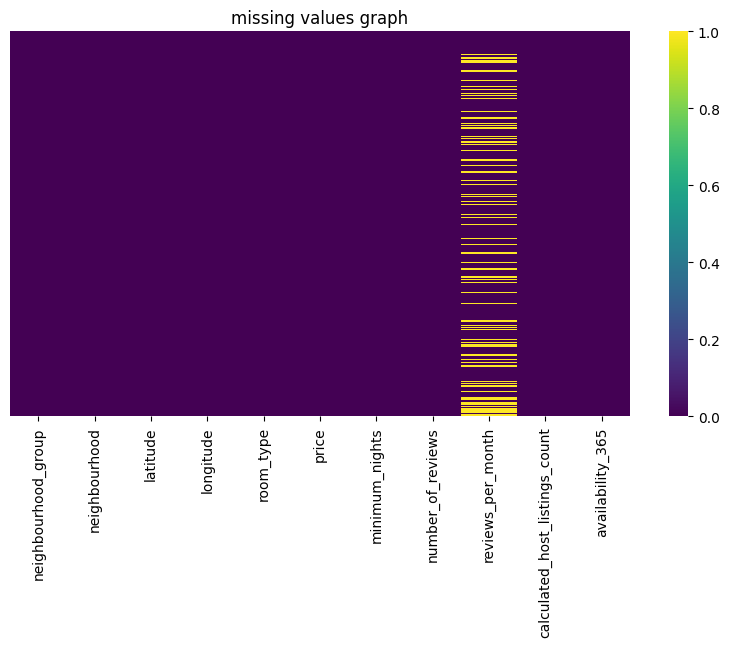

In [18]:
plt.figure(figsize=(10,5))
plt.title("missing values graph")
sns.heatmap(df.isnull(), cmap='viridis',
            yticklabels=False)
plt.show()

# Using fillna()

In [90]:
df["reviews_per_month"].fillna(df["reviews_per_month"].mean(), inplace=True)
#median;
#df1=df["reviews_per_month"].fillna(df["reviews_per_month"].median())
#mode
#df1=df["reviews_per_month"].fillna(df["reviews_per_month"].mode[0]())
df.isnull().sum()

C:\Users\BILAL COMPUTER VEHOA\AppData\Local\Temp\ipykernel_13264\1710520994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(df["reviews_per_month"].mean(), inplace=True)


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [44]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


# Using simple imputer (for example)

In [22]:
from sklearn. impute import SimpleImputer
si = SimpleImputer(strategy = "mean")
ar=si.fit_transform(df[["reviews_per_month"]])
#df2=pd.DataFrame(ar)
#print(df2.isnull().sum())
#print()
#df2.head()

# Data distribution

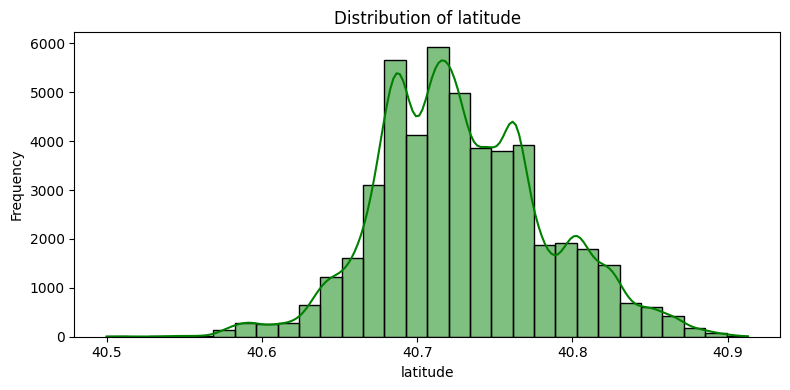

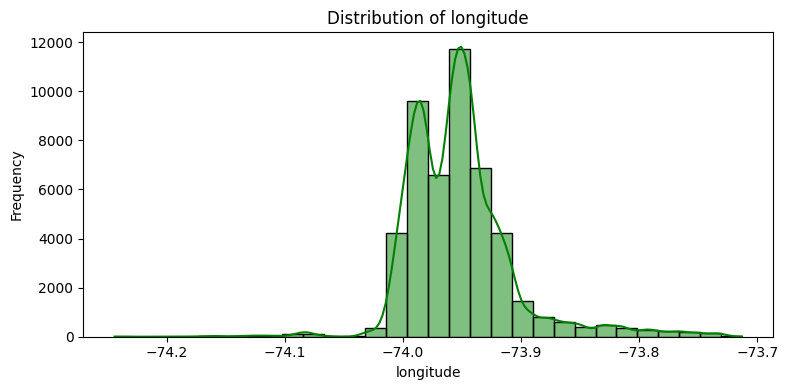

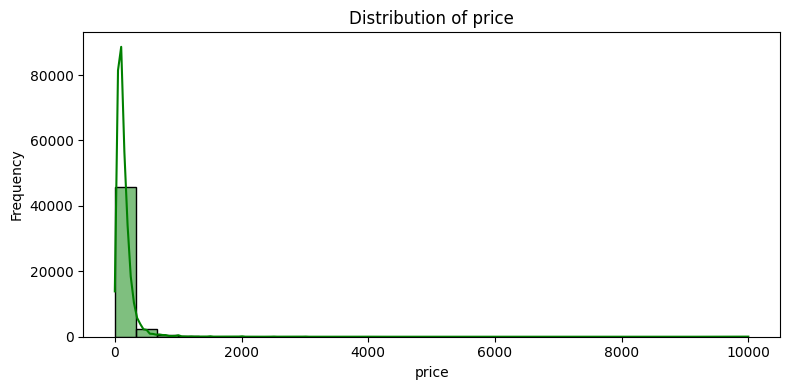

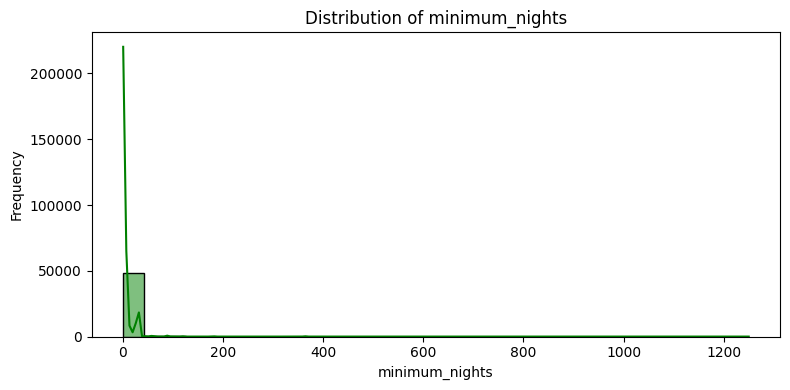

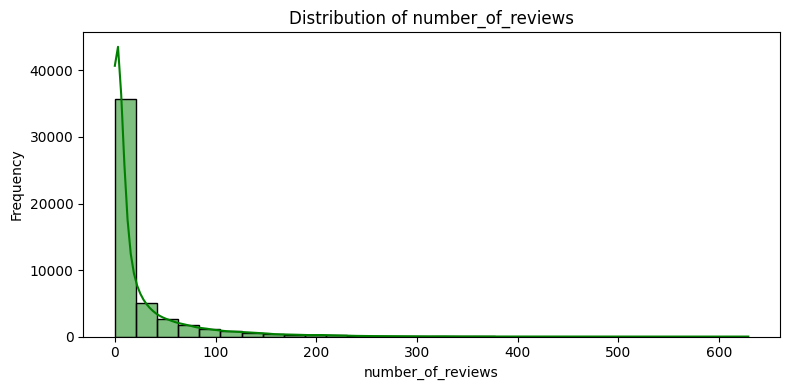

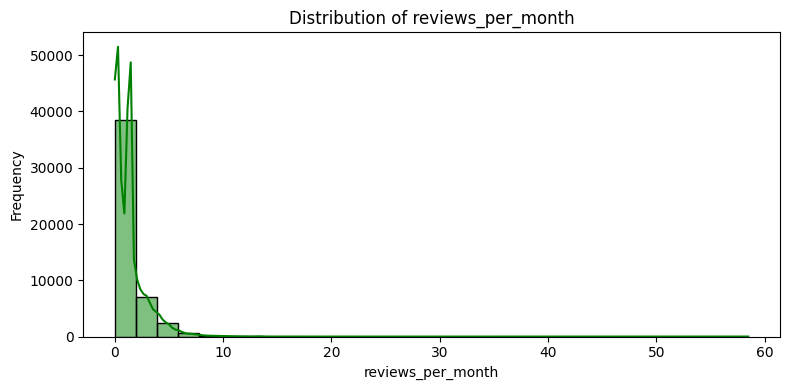

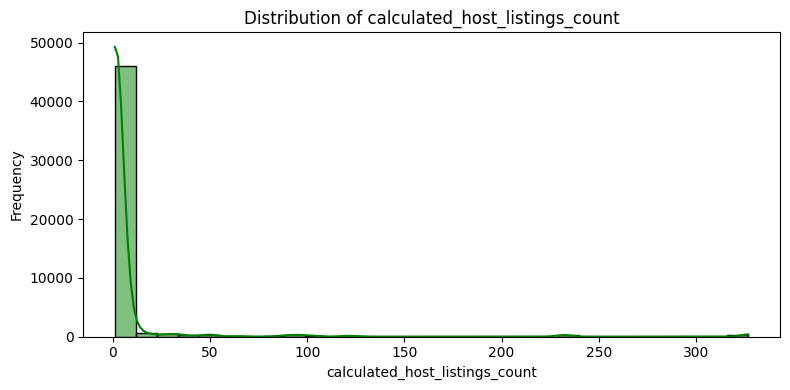

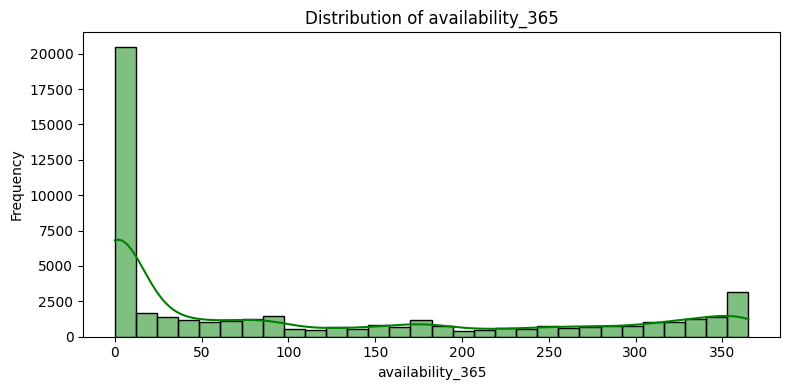

In [23]:
numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], color='g', bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


<Figure size 1000x500 with 0 Axes>

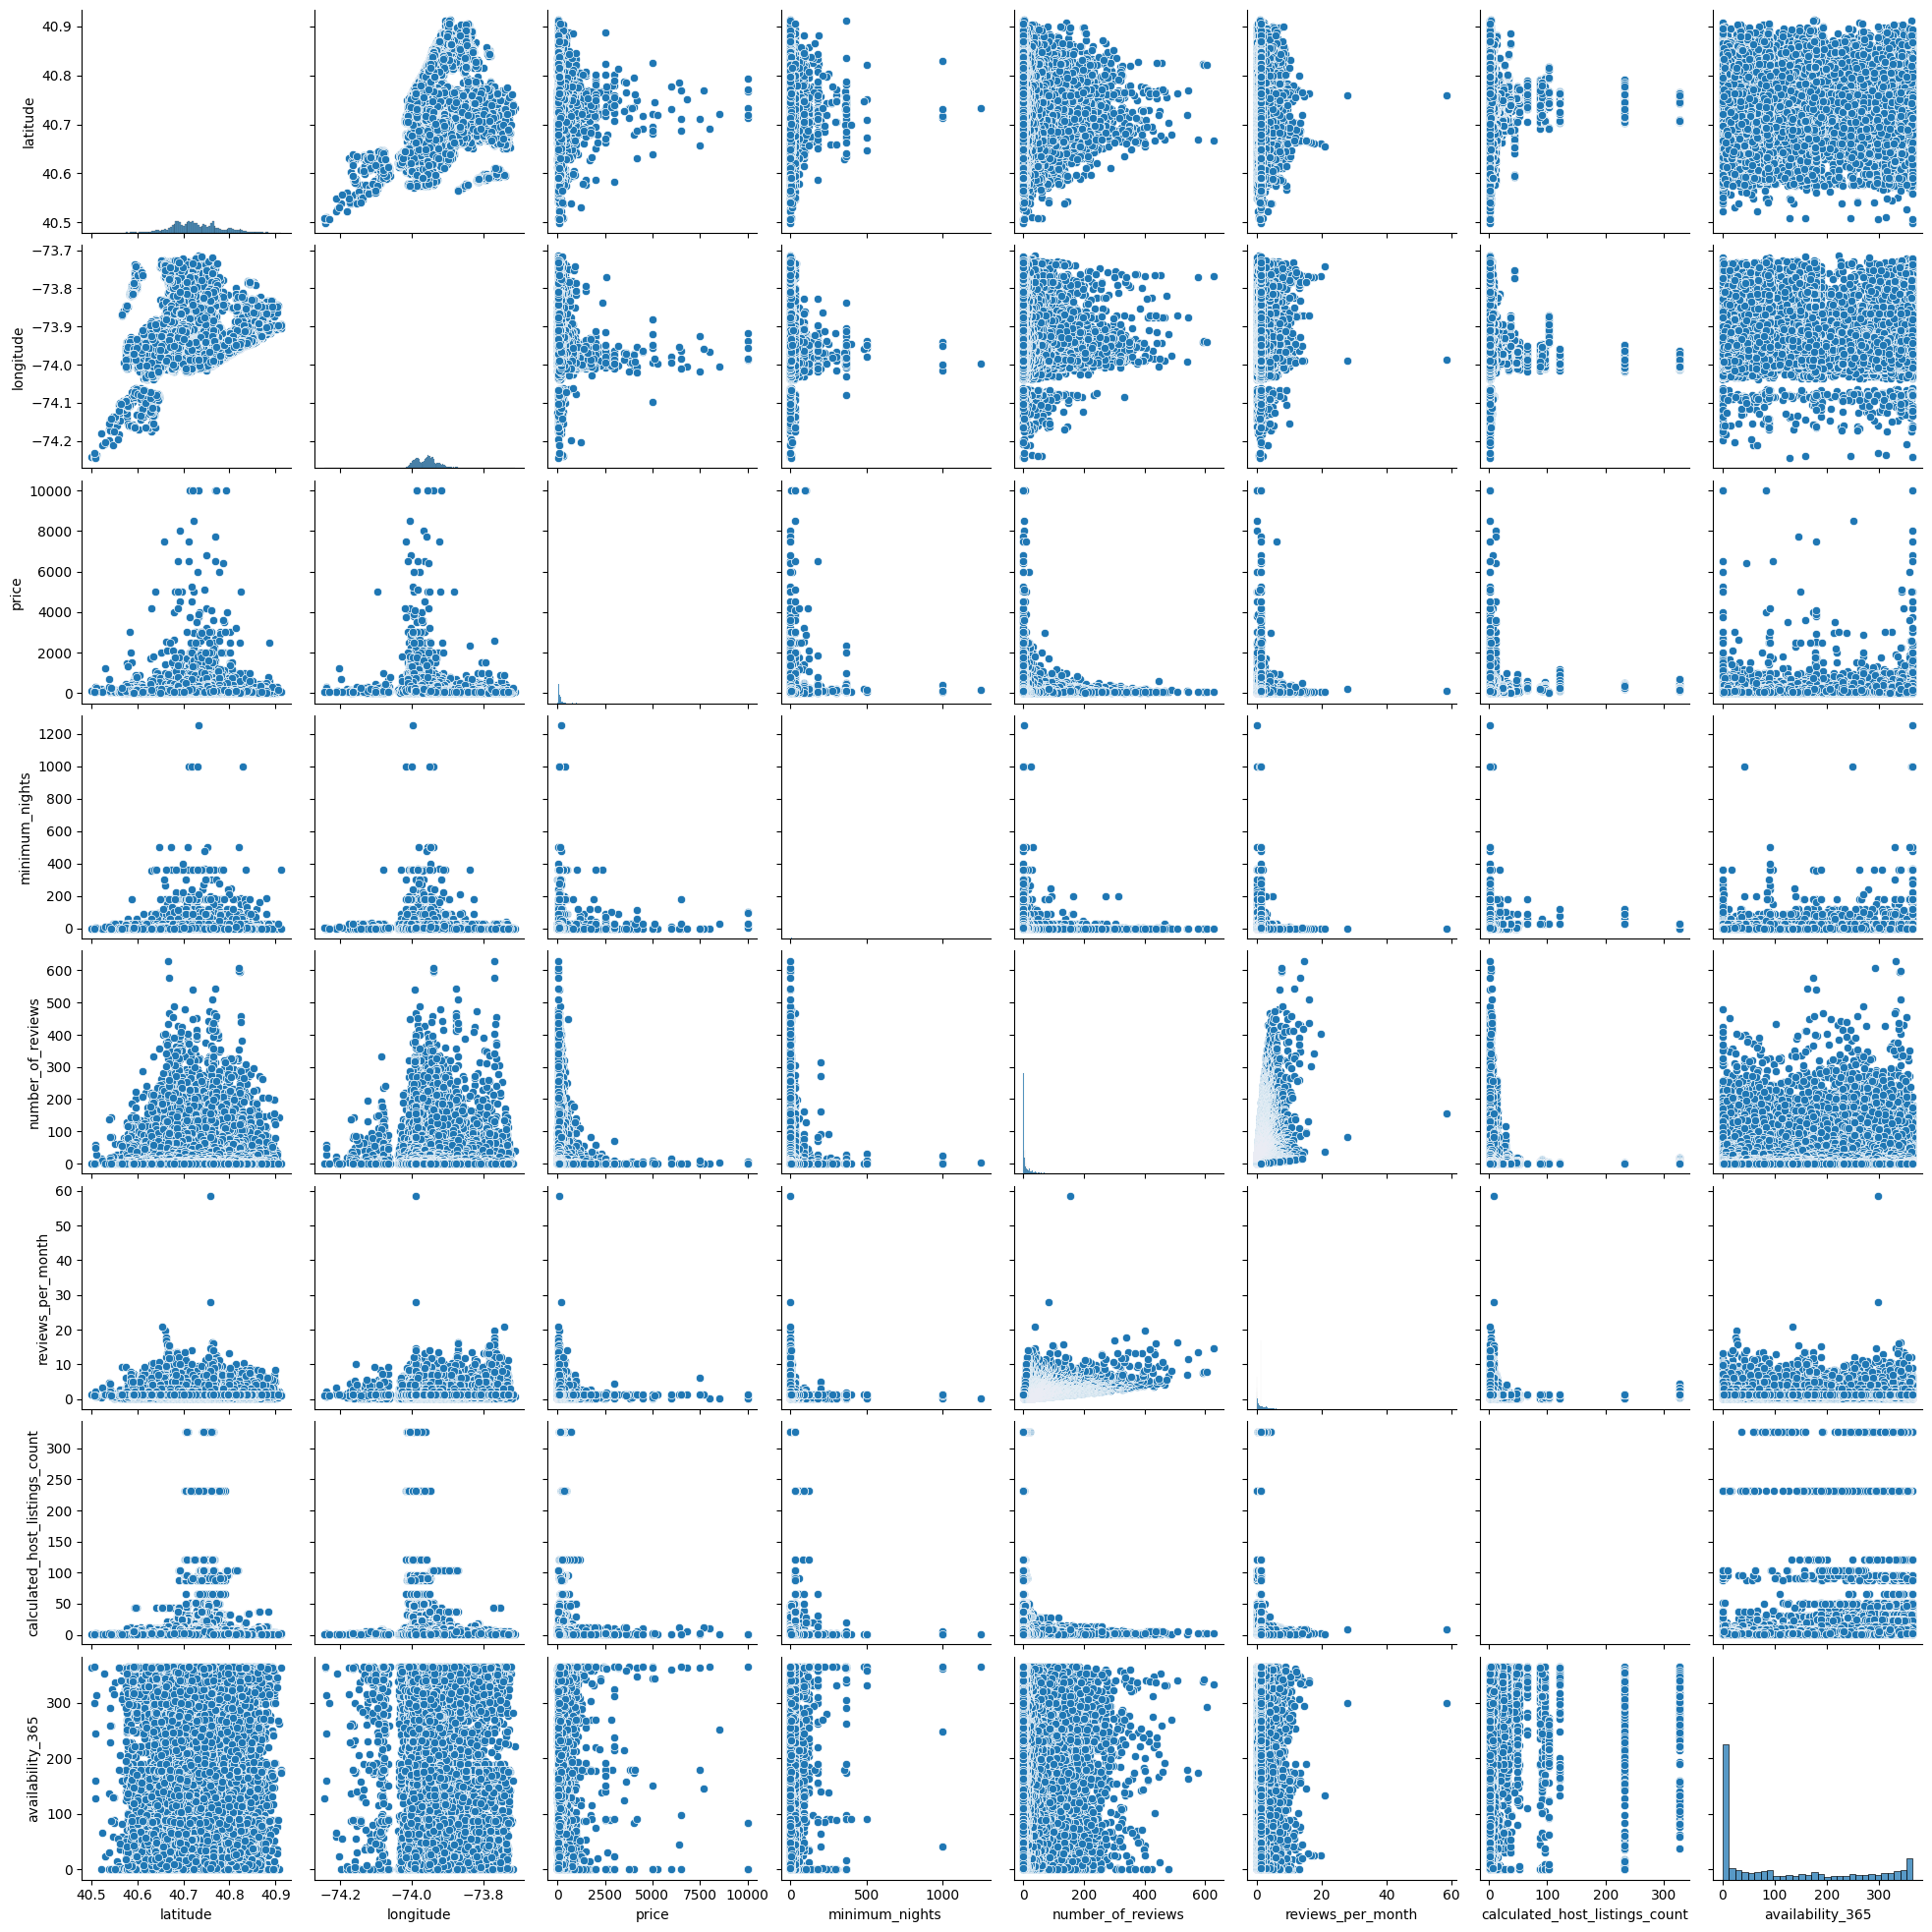

In [24]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df)
plt.show()

# Correlation

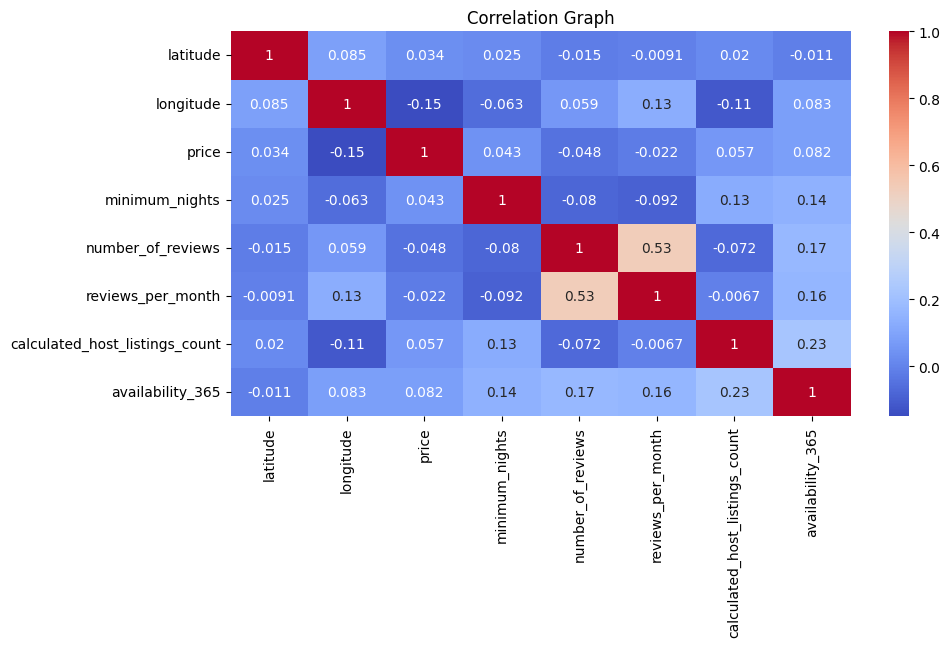

In [91]:
df_new=df.select_dtypes(include="number")
plt.figure(figsize=(10, 5))
plt.title("Correlation Graph")
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
plt.show()

# Outliers detection

## Through IQR

In [92]:
df_num=df.select_dtypes(include="number")

# Create a summary report
outlier_report = []

for col in df_num.columns:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)]
    count = outliers.shape[0]
    
    # Store the summary
    outlier_report.append({
        'Column': col,
        'Outlier Count': count,
        'Outlier Values (sample)': outliers[col].unique()[:5]  # first 5 unique outlier values
    })

# Convert to DataFrame
outlier_summary_df = pd.DataFrame(outlier_report)
print(outlier_summary_df)


                           Column  Outlier Count  \
0                        latitude            425   
1                       longitude           2833   
2                           price           2972   
3                  minimum_nights           6607   
4               number_of_reviews           6021   
5               reviews_per_month           4103   
6  calculated_host_listings_count           7081   
7                availability_365              0   

                             Outlier Values (sample)  
0  [40.88057, 40.89747, 40.89557, 40.87991, 40.5781]  
1  [-73.83168, -74.08088, -73.76597, -74.08537, -...  
2                          [375, 800, 500, 350, 400]  
3                               [45, 90, 14, 60, 29]  
4                           [270, 74, 430, 118, 160]  
5                     [4.64, 4.44, 4.72, 4.22, 3.89]  
6                                   [6, 4, 5, 7, 13]  
7                                                 []  


# Through Boxplot

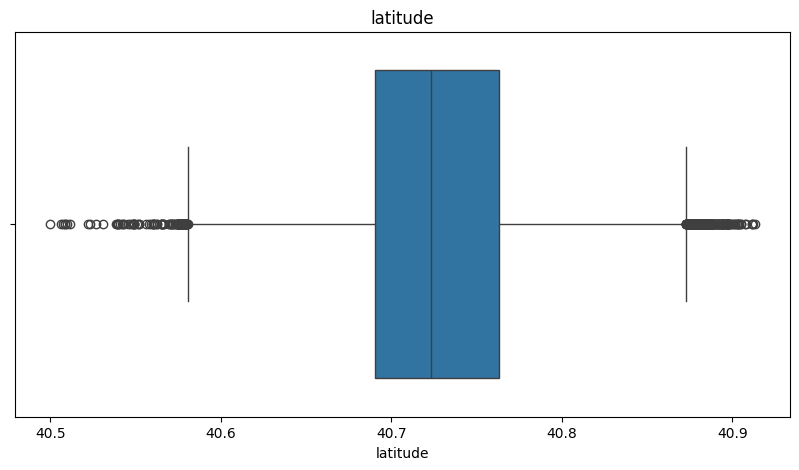

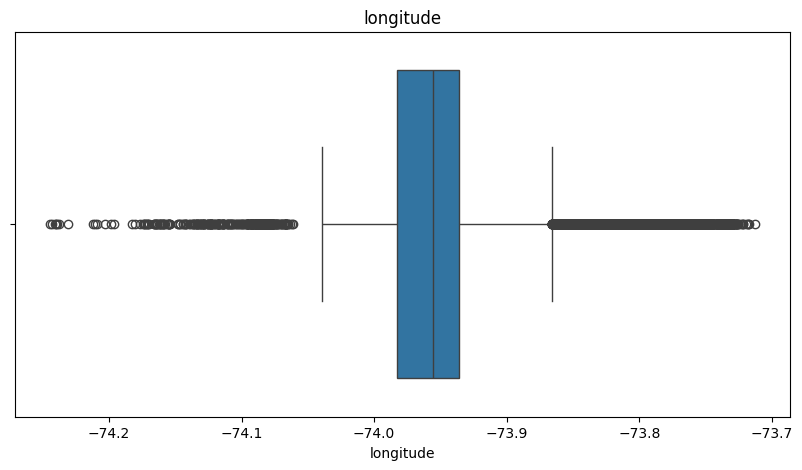

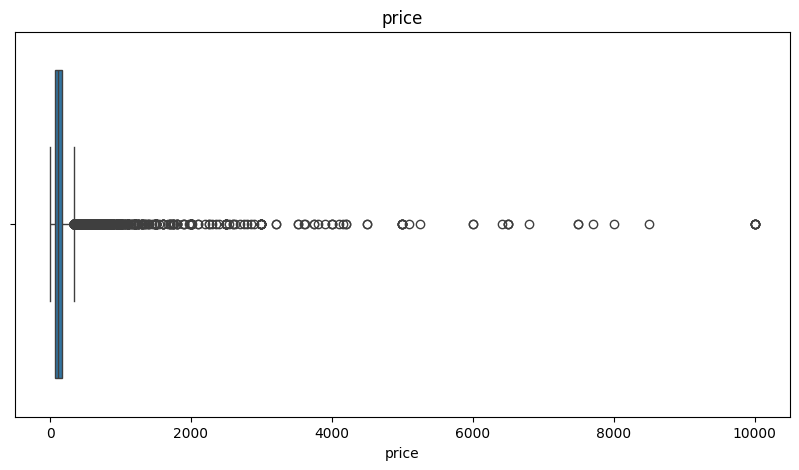

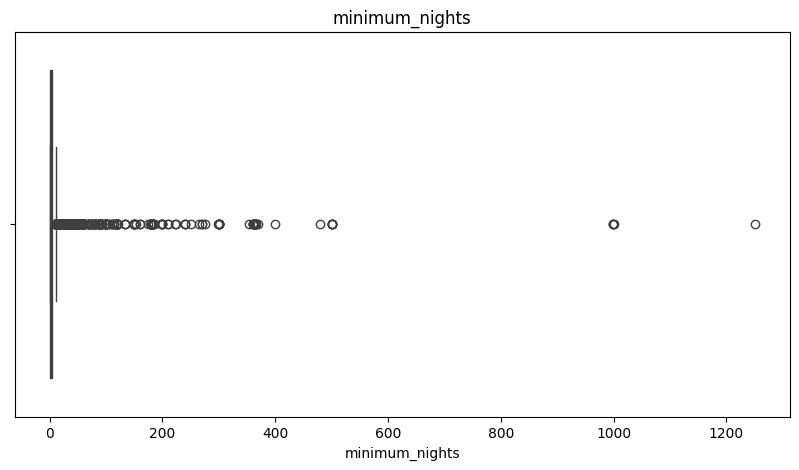

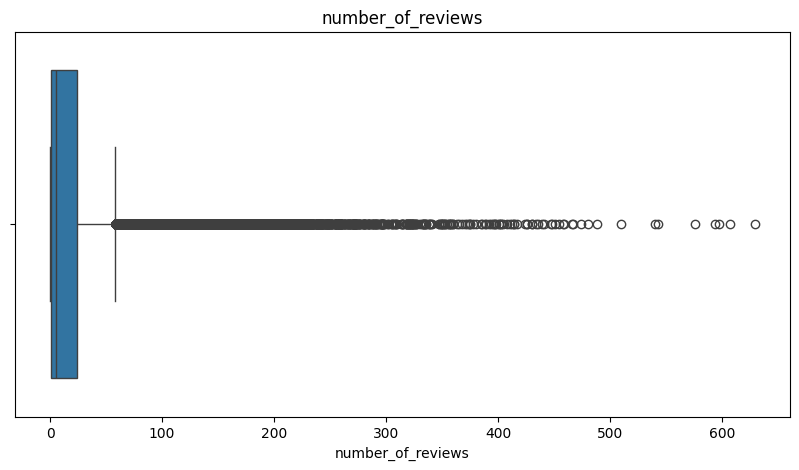

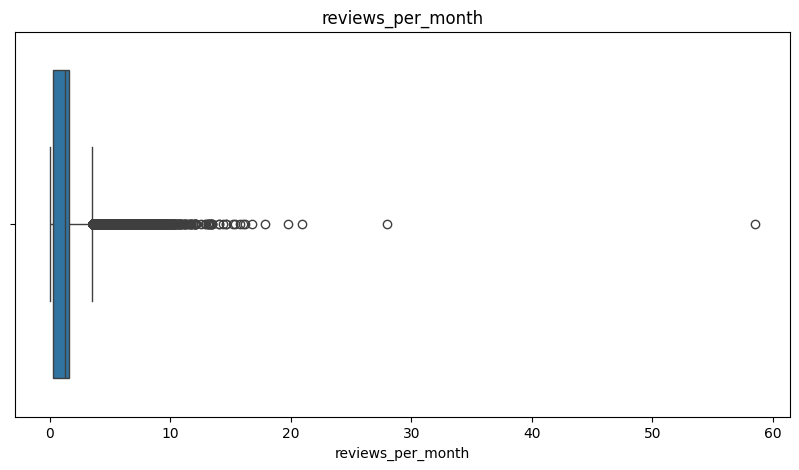

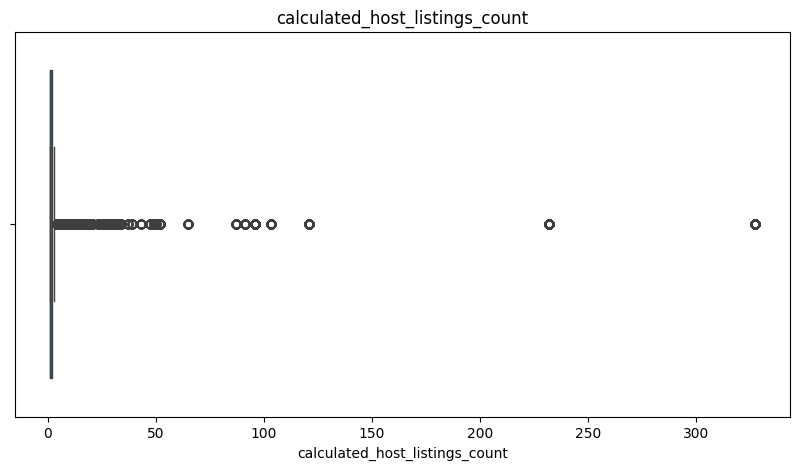

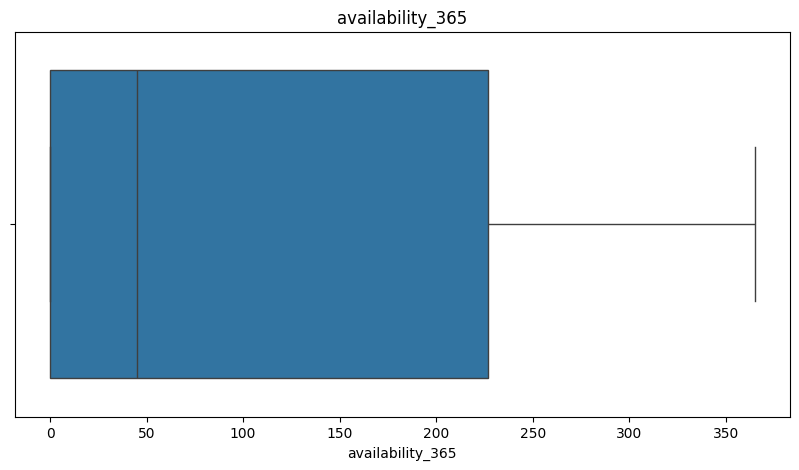

In [32]:

for col in df_num.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


# Outliers removing

### Removing all outliers
### Note:
In the cell below, we have removed all outliers for practice purposes.
However, it's important to keep in mind that this can lead to significant data loss — as it did in our case.
Therefore, every step should be carefully taken based on the nature and requirements of your dataset.

In [93]:
numeric_cols = df.select_dtypes(include='number').columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
         (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)


df.drop(index=df.index[~mask], inplace=True)


df.reset_index(drop=True, inplace=True)


In [94]:
df.shape

(27767, 11)

In [95]:
print(df.columns)
df.shape

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


(27767, 11)

# Removing duplicate values

In [96]:
df.drop_duplicates(inplace= True)
df.shape

(27767, 11)

# Feature encoding

In [60]:
#checking categories of following columns
for i in df[["neighbourhood_group","neighbourhood","room_type", ]]:
    print(i,df[i].unique())

neighbourhood_group ['Manhattan' 'Brooklyn' 'Queens' 'Bronx']
neighbourhood ['Midtown' 'Harlem' 'East Harlem' 'Upper West Side' 'Williamsburg'
 'Windsor Terrace' 'Inwood' "Hell's Kitchen" 'Flatbush' 'South Slope'
 'Fort Greene' 'Bedford-Stuyvesant' 'Kips Bay' 'Lower East Side'
 'Clinton Hill' 'Park Slope' 'East Village' 'Washington Heights'
 'Bushwick' 'Prospect Heights' 'Prospect-Lefferts Gardens'
 'Upper East Side' 'Flatlands' 'Cobble Hill' 'DUMBO' 'Chelsea'
 'Ditmars Steinway' 'Roosevelt Island' 'Chinatown' 'Greenwich Village'
 'Little Italy' 'Kensington' 'Carroll Gardens' 'Greenpoint' 'Boerum Hill'
 'Crown Heights' 'Astoria' 'West Village' 'SoHo' 'Morningside Heights'
 'Gravesend' 'Nolita' 'Gowanus' 'Bensonhurst' 'NoHo' 'Sunset Park'
 'Ridgewood' 'Gramercy' 'Brighton Beach' 'Jackson Heights'
 'Financial District' 'East Flatbush' 'Theater District'
 'Long Island City' 'Vinegar Hill' 'East New York' 'Mott Haven'
 'Battery Park City' 'Two Bridges' 'Sunnyside' 'Columbia St'
 'Flatiron 

# Label encoding (for "neighbourhood" & "neighbourhood_group")

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["neighbourhood"] = le.fit_transform(df["neighbourhood"])
df["neighbourhood_group"] = le.fit_transform(df["neighbourhood_group"])

df[["neighbourhood", "neighbourhood_group"]].head()


,neighbourhood,neighbourhood_group
0,73,2
1,56,2
2,38,2
3,109,2
4,38,2


# OneHotEncoding (for "room_type" )

In [98]:
encoded_data=pd.get_dummies(df["room_type"],dtype=int)
df=pd.concat([df,encoded_data], axis=1)
df.drop("room_type", axis=1, inplace=True)

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2,73,40.75362,-73.98377,225,1,45,0.380000,2,355,1,0,0
1,2,56,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0
2,2,38,40.79851,-73.94399,80,10,9,0.100000,1,0,1,0,0
3,2,109,40.80316,-73.96545,135,5,53,0.430000,1,6,1,0,0
4,2,38,40.79685,-73.94872,190,7,0,1.373221,2,249,1,0,0


In [106]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Entire home/apt',
       'Private room', 'Shared room'],
      dtype='object')

# Feature Scaling

In [104]:
df.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
count,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.000000,27767.00000,27767.000000
mean,1.582958,59.921994,40.729193,-73.957244,122.660316,2.940037,9.396298,0.877825,1.249973,65.444556,0.501711,0.48003,0.018259
std,0.653358,37.977926,0.052734,0.029025,67.321161,1.978211,12.993437,0.779595,0.544562,109.471880,0.500006,0.49961,0.133889
min,0.000000,0.000000,40.580780,-74.039420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,30.000000,40.690530,-73.981690,70.000000,1.000000,1.000000,0.175000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,56.000000,40.721040,-73.955580,100.000000,2.000000,4.000000,0.700000,1.000000,0.000000,1.000000,0.00000,0.000000
75%,2.000000,101.000000,40.763830,-73.939860,160.000000,4.000000,13.000000,1.373221,1.000000,87.000000,1.000000,1.00000,0.000000
max,3.000000,118.000000,40.872470,-73.866330,334.000000,11.000000,58.000000,3.530000,3.000000,365.000000,1.000000,1.00000,1.000000


In [115]:
cols_to_scale=["neighbourhood","price","minimum_nights", "number_of_reviews","calculated_host_listings_count"]

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_array=std.fit_transform(df[cols_to_scale])

In [117]:
scaled_data=pd.DataFrame(scaled_array,columns=cols_to_scale)


,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2,73,40.75362,-73.98377,225,1,45,0.380000,2,355,1,0,0
1,2,56,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0
2,2,38,40.79851,-73.94399,80,10,9,0.100000,1,0,1,0,0
3,2,109,40.80316,-73.96545,135,5,53,0.430000,1,6,1,0,0
4,2,38,40.79685,-73.94872,190,7,0,1.373221,2,249,1,0,0


In [119]:
df[cols_to_scale] = scaled_data
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2,0.344364,40.75362,-73.98377,1.520198,-0.980721,2.740179,0.380000,1.377329,355,1,0,0
1,2,-0.103272,40.80902,-73.94190,0.406116,0.030312,-0.723170,1.373221,-0.459043,365,0,1,0
2,2,-0.577240,40.79851,-73.94399,-0.633695,3.568928,-0.030500,0.100000,-0.459043,0,1,0,0
3,2,1.292300,40.80316,-73.96545,0.183299,1.041345,3.355886,0.430000,-0.459043,6,1,0,0
4,2,-0.577240,40.79685,-73.94872,1.000293,2.052378,-0.723170,1.373221,1.377329,249,1,0,0
